Depresi adalah keadaan dimana seseorang mengalami kesedihan yang mengakibatkan menurunnya keinginan akan sesuatu. Depresi tidak boleh diremehkan karena akan menggangu kehidupan sehari hari bahkan ada yang sampai memutuskan bunuh diri. Biasanya seseorang tidak sadar kalau teman atau keluargannya mengalami depresi. karena hal tersebut saya membuat projek ini untuk menetahui jika seseorang mengalami depresi memlalui tulisan orang tersebut di media sosial.Kelas 1 adalah depresi dan kelas 0 adalah tidak depresi

#Import Libarry

In [2]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'#cacccf'})
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from wordcloud import WordCloud 

In [4]:
df = pd.read_csv('depression_dataset_reddit_cleaned.csv')
df.head(5)

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


#Data Cleaning

In [5]:
df.shape

(7731, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [7]:
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

In [8]:
df.duplicated().sum()

81

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(7650, 2)

In [11]:
df.duplicated().sum()

0

In [12]:
#ubah nama kolom
df.rename(columns={'clean_text' : 'Kalimat', 'is_depression' : 'Kategori' }, inplace=True)

In [ ]:
df.head(5)

,Kalimat,Kategori
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [13]:
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 11.6 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=98712698fd954c4db0e048cc56ac9f4e666570d7d8a9348024f75697255e9557
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [14]:
#Translate the other languages to english
import googletrans
from googletrans import *
translator = googletrans.Translator()

df['Kalimat'] = df['Kalimat'].astype(str) #changing datatype to string
df['Kalimat2'] = df['Kalimat'].apply(translator.translate, src='auto', dest='id').apply(getattr, args=('text',))
df.head(5)

,Kalimat,Kategori,Kalimat2
0,we understand that most people who reply immed...,1,kami memahami bahwa kebanyakan orang yang sege...
1,welcome to r depression s check in post a plac...,1,selamat datang di pos r depresi check in tempa...
2,anyone else instead of sleeping more when depr...,1,orang lain daripada tidur lebih banyak ketika ...
3,i ve kind of stuffed around a lot in my life d...,1,saya sudah agak banyak dalam hidup saya menund...
4,sleep is my greatest and most comforting escap...,1,tidur adalah pelarian terbesar dan paling meng...


In [15]:
def convert_lowercase(text):
    text = text.lower()
    return text

df['Kalimat2'] = df['Kalimat2'].apply(convert_lowercase)
df.head(5)

,Kalimat,Kategori,Kalimat2
0,we understand that most people who reply immed...,1,kami memahami bahwa kebanyakan orang yang sege...
1,welcome to r depression s check in post a plac...,1,selamat datang di pos r depresi check in tempa...
2,anyone else instead of sleeping more when depr...,1,orang lain daripada tidur lebih banyak ketika ...
3,i ve kind of stuffed around a lot in my life d...,1,saya sudah agak banyak dalam hidup saya menund...
4,sleep is my greatest and most comforting escap...,1,tidur adalah pelarian terbesar dan paling meng...


In [16]:
df2 = df.copy() #untuk EDA

In [17]:
df2['Kategori'] = df2['Kategori'].map({1:"Depresi",0:"Tidak_Depresi"})

In [18]:
df2.head(5)

,Kalimat,Kategori,Kalimat2
0,we understand that most people who reply immed...,Depresi,kami memahami bahwa kebanyakan orang yang sege...
1,welcome to r depression s check in post a plac...,Depresi,selamat datang di pos r depresi check in tempa...
2,anyone else instead of sleeping more when depr...,Depresi,orang lain daripada tidur lebih banyak ketika ...
3,i ve kind of stuffed around a lot in my life d...,Depresi,saya sudah agak banyak dalam hidup saya menund...
4,sleep is my greatest and most comforting escap...,Depresi,tidur adalah pelarian terbesar dan paling meng...


##Exploratory Data Analysis

jumlah kategori

In [ ]:
class_df = df2.groupby('Kategori').count()['Kalimat2'].reset_index().sort_values(by='Kalimat2',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Kategori,Kalimat2
1,Tidak_Depresi,3889
0,Depresi,3761


pie chart

In [ ]:
fig = px.pie(df2, names = ['Depresi', 'Tidak_Depresi'], template = 'seaborn', 
             values = df2.Kategori.value_counts(),
            title = 'Kategori')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show()

datanya bisa dikatakan seimbang antar kelasnya

barplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



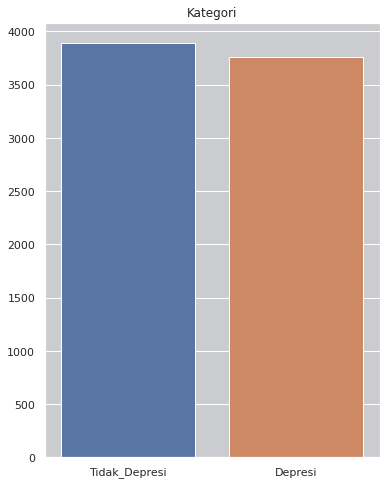

In [ ]:
Dep_count  = df2['Kategori'].value_counts()
Dep_count = Dep_count[:2,]
plt.figure(figsize=(6,8))
sns.barplot(Dep_count.index, Dep_count.values, alpha=1)
plt.title('Kategori')
plt.show()

buat data hitung jumlah karakter dan kata

In [ ]:
df2['Total Words'] = df2['Kalimat2'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df2['Total Chars'] = df2["Kalimat2"].apply(count_total_words)

In [ ]:
df2.head(5)

,Kalimat,Kategori,Kalimat2,Total Words,Total Chars
0,we understand that most people who reply immed...,Depresi,kami memahami bahwa kebanyakan orang yang sege...,731,4490
1,welcome to r depression s check in post a plac...,Depresi,selamat datang di pos r depresi check in tempa...,398,2281
2,anyone else instead of sleeping more when depr...,Depresi,orang lain daripada tidur lebih banyak ketika ...,40,237
3,i ve kind of stuffed around a lot in my life d...,Depresi,saya sudah agak banyak dalam hidup saya menund...,91,507
4,sleep is my greatest and most comforting escap...,Depresi,tidur adalah pelarian terbesar dan paling meng...,52,296


visualisasi

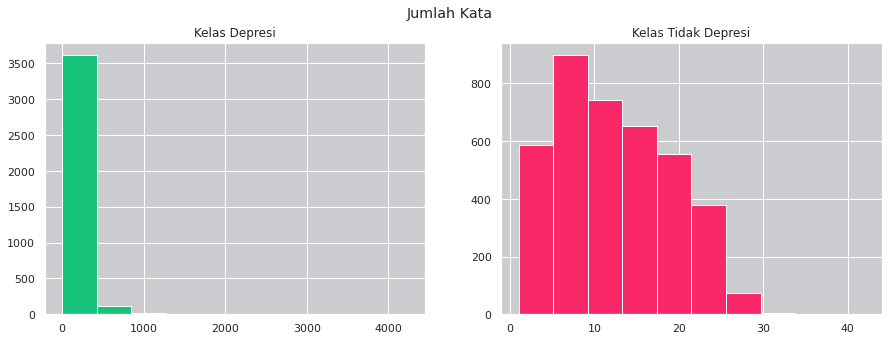

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

lenword=df2[df2['Kategori']=="Depresi"]['Kalimat2'].str.split().map(lambda x: len(x))
ax1.hist(lenword,color='#17C37B')
ax1.set_title('Kelas Depresi')


lenword=df2[df2['Kategori']=="Tidak_Depresi"]['Kalimat2'].str.split().map(lambda x: len(x))
ax2.hist(lenword,color='#F92969')
ax2.set_title('Kelas Tidak Depresi')

fig.suptitle('Jumlah Kata')
plt.show()

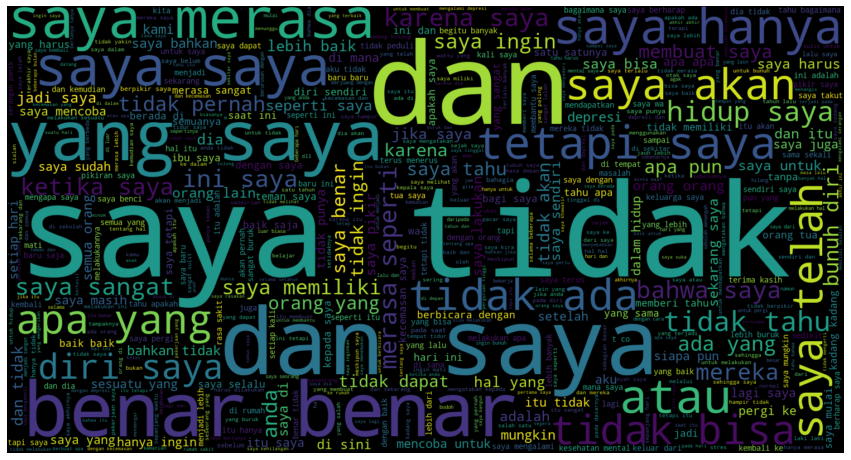

In [ ]:
#Visual Kata Depresi
text = " ".join(df2[df2['Kategori'] == 'Depresi']['Kalimat2'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

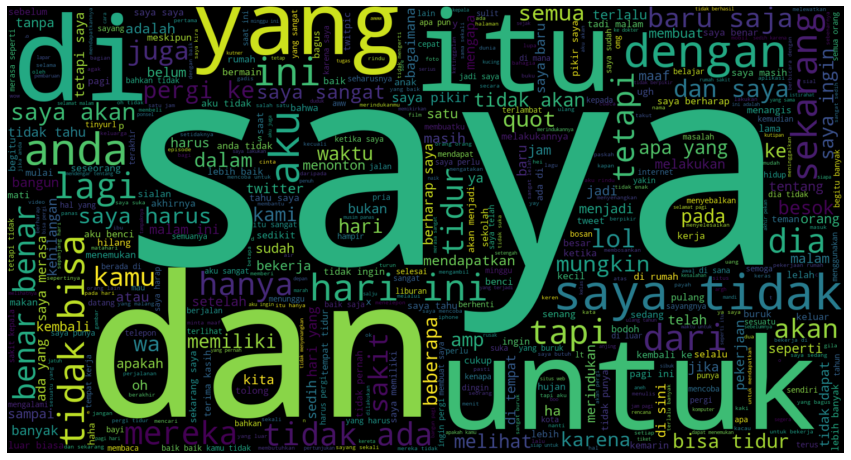

In [ ]:
#Visual Kata Tidak Depresi
text = " ".join(df2[df2['Kategori'] == 'Tidak_Depresi']['Kalimat2'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#Data Preprocessing

In [19]:
X = df["Kalimat2"]
Y = df['Kategori'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42, stratify = Y)

In [20]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

#Modeling Naive Bayes

In [21]:
def train_model(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(Y_test, Y_pred), 3)
    precision = round(precision_score(Y_test, Y_pred), 3)
    recall = round(recall_score(Y_test, Y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(Y_test, Y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(Y_test, Y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

Accuracy of the model: 0.899
Precision Score of the model: 0.857
Recall Score of the model: 0.952


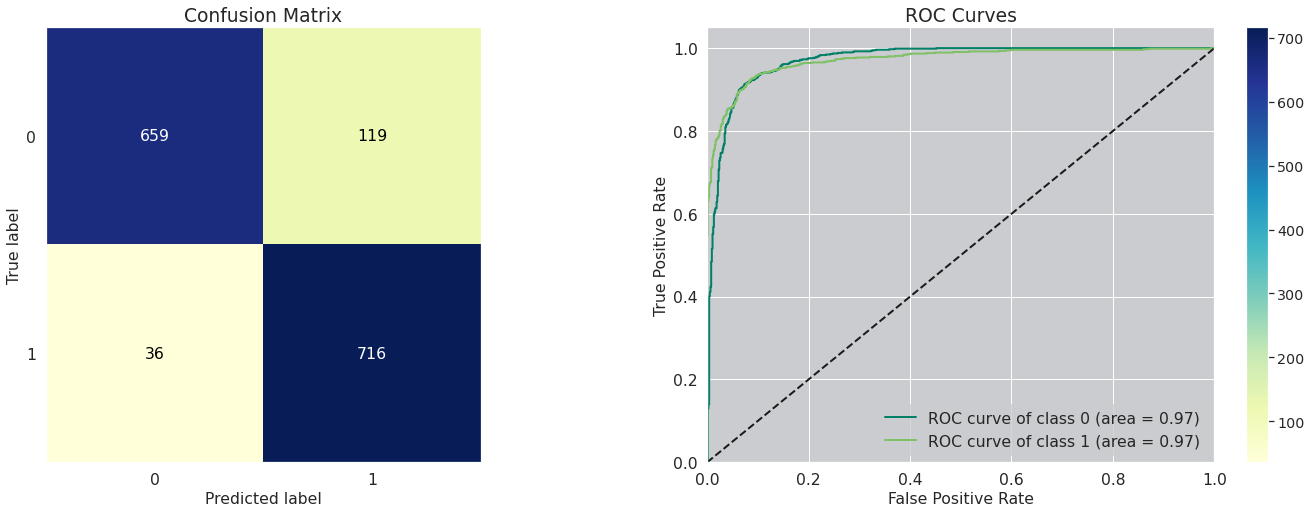

In [23]:
nb = MultinomialNB()
train_model(nb)

#Random Forest

Accuracy of the model: 0.955
Precision Score of the model: 0.993
Recall Score of the model: 0.915


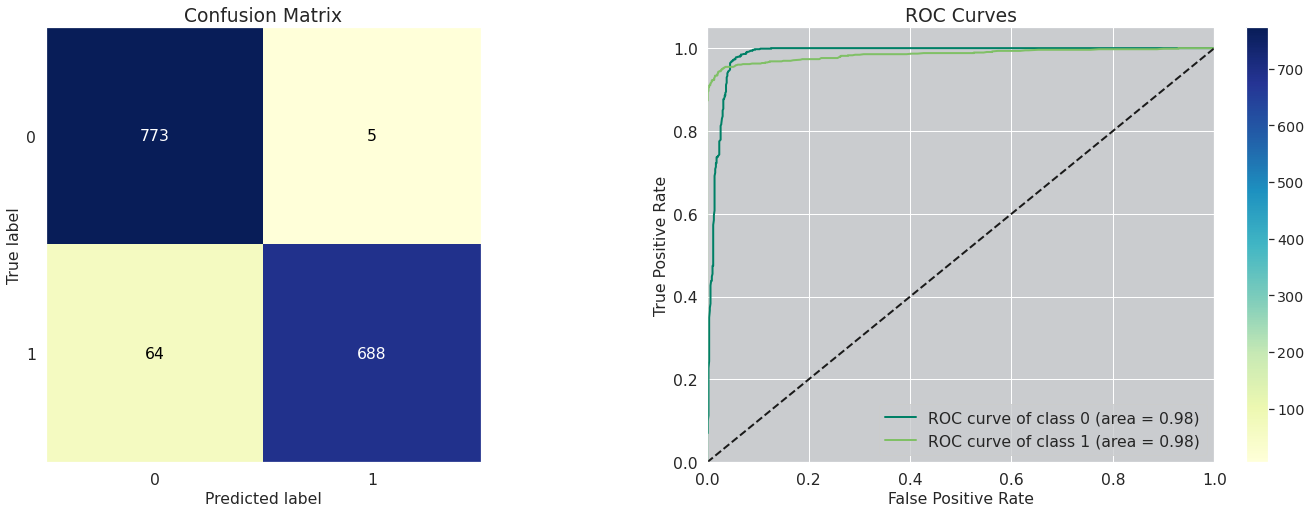

In [24]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    train_score.append(accuracy_score(Y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Accuracy of the model: 0.854
Precision Score of the model: 0.952
Recall Score of the model: 0.741


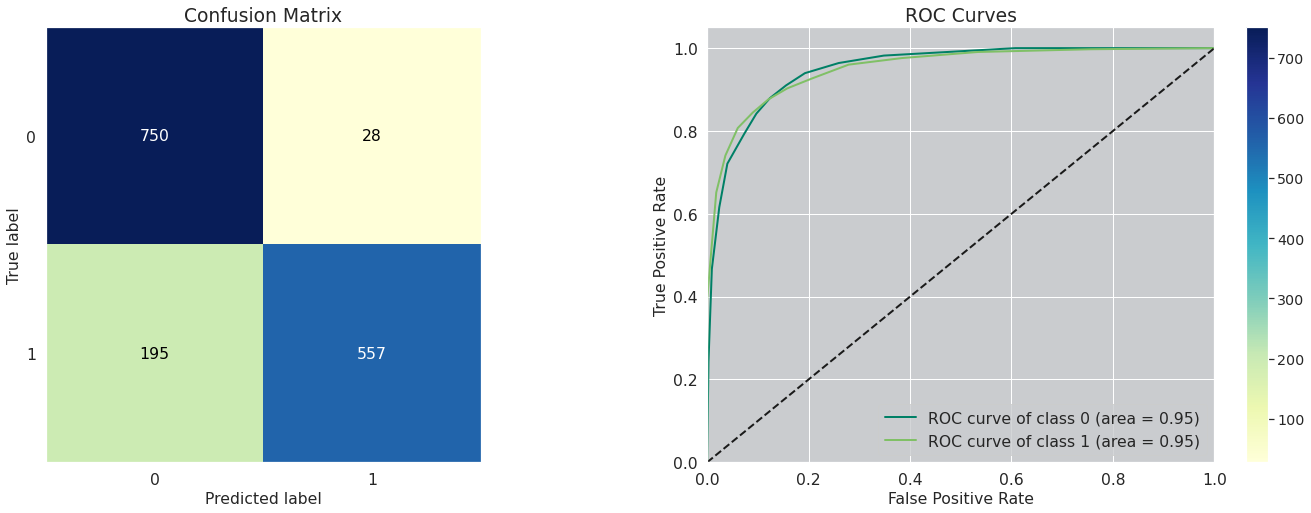

In [ ]:
train_model(model)

#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}
svm_cv_model = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
svm_cv_model.best_score_

0.959640522875817

In [ ]:
svm_cv_model.best_params_

{'C': 4, 'kernel': 'rbf'}

In [ ]:
svm = SVC(C = 2, kernel='linear', probability=True).fit(X_train, Y_train)

In [ ]:
Y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_pred)

0.9477124183006536

Accuracy of the model: 0.948
Precision Score of the model: 0.972
Recall Score of the model: 0.92


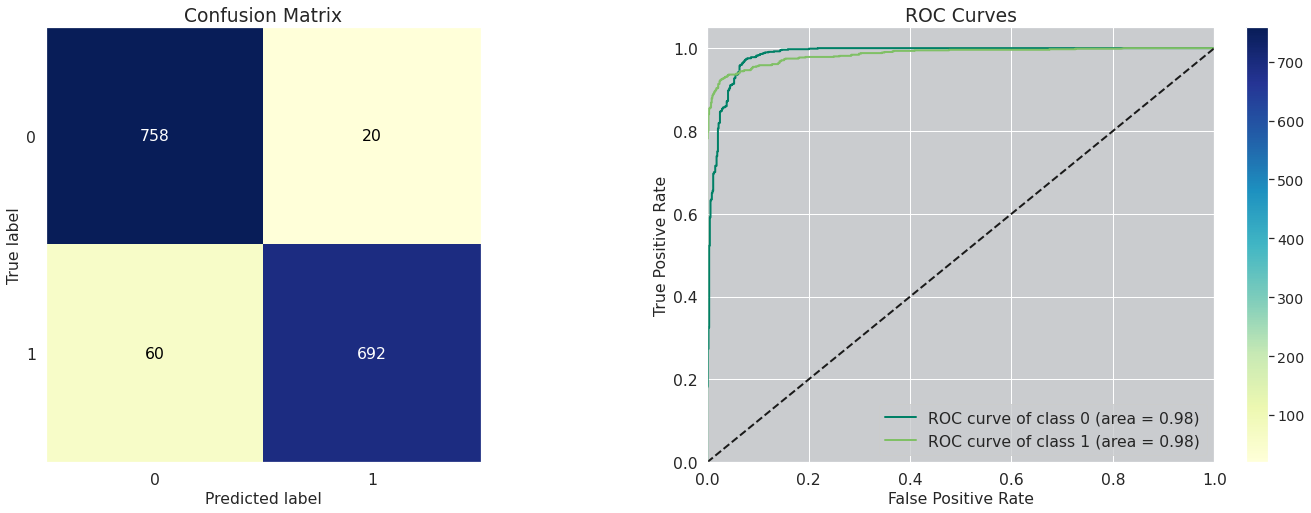

In [ ]:
train_model(svm)

#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 10))), 
          "min_samples_split":[2, 4], 
          "min_samples_leaf":list(range(1, 10))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, Y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, Y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best_params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(max_depth=8, min_samples_leaf=9)

Accuracy of the model: 0.93
Precision Score of the model: 0.964
Recall Score of the model: 0.891


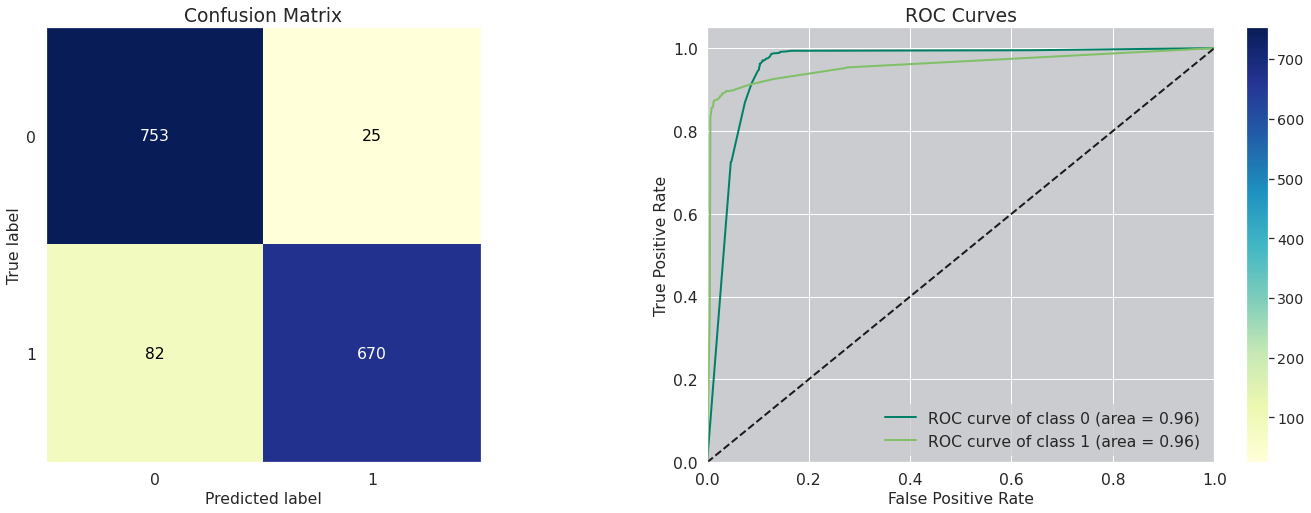

In [ ]:
train_model(tree_clf)

##Hyperparameter Random Forest

coba menggunakan hyperparameter random forest

In [26]:
from sklearn.model_selection import GridSearchCV

In [32]:
n_estimators = [100, 300, 500, 1100]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_samples_split = [2, 10]
min_samples_leaf = [1, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, Y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, Y_train)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=4)

Accuracy of the model: 0.84
Precision Score of the model: 0.994
Recall Score of the model: 0.678


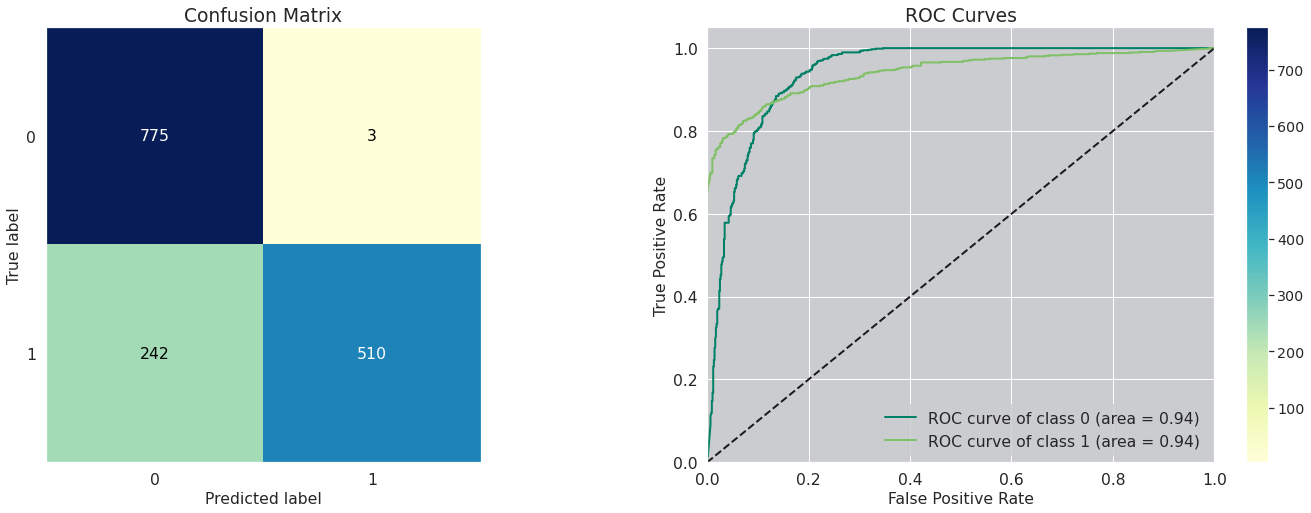

In [33]:
train_model(rf_clf)

#Evaluasi

Karena mendapatkan model yang baik pada random forest tanpa hyperparameter dibandingkan naive bayest, KNN,support vector machine, dan decision tree  maka akan digunakan random forest untuk proses deploy

In [38]:
import joblib
joblib.dump(rf, "Depression.joblib")

['Depression.joblib']

In [40]:
import pickle
pickle.dump(rf, open("model.pkl", "wb"))

#Deploy